**Problem 4.1** In this problem we will demonstrate the linear performance gain promised by relation (4.46) in code for Example 4.2. Formulate a model wo of your choice, and generate data according to the observation model (4.39), ensuring agents are homogenous by sampling $\boldsymbol{h}_k$ and $\boldsymbol{v}_k$ from identical distributions. Reasonable choices are $\boldsymbol{h}_k \sim \mathcal{N}(0, \sigma_{h}^2 I_M)$ and $\boldsymbol{v}_k \sim \mathcal{N}(0, \sigma_{v}^2)$. Implement recursions (4.42)–-(4.43) and plot the evolution of the error over time. Compare the performance for $K = 1$, $K = 10$ and $K = 100$ agents and verify whether you observe linear gains in performance.

**Solution.** We begin by importing some standard packages which will be useful throughout this exercise:



In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We set values for the variances $\sigma_v^2$ and $\sigma_h^2$, as well as dimension $M$ and an array of network sizes $K$, called ''nr_agents''. Then we generate an arbitrary $w^o$ by sampling from a standard normal distribution. We also fix the total number of iterations to run.

In [6]:
sigma_h_squared = 1
sigma_v_squared = 1
mu = 0.01

M = 10
nr_agents = [1, 10, 100]
iterations = 1000
experiments = 10

w_o = np.random.multivariate_normal(np.zeros(M), np.eye(M))

We now iterate over all network sizes, and implement recursions (4.42)--(4.43) for all iterations. Since we are solving an expected risk minimization problem via stochastic gradient descent, we can generate data online for every agent as it is needed. All errors are stored in the ''error'' matrix.

In [7]:
error = np.zeros((iterations+1, len(nr_agents), experiments))

for experiment in range(experiments):
    for idK, K in enumerate(nr_agents):
        w = np.zeros(M)
        error[0, idK, experiment] = np.square(np.linalg.norm(w - w_o))
        for i in range(1, iterations+1):
            psi = np.zeros((M, K))
            for k in range(K):
                h = np.random.multivariate_normal(np.zeros(M), sigma_h_squared*np.eye(M)).T
                v = np.random.normal(0, sigma_v_squared)
                gamma = np.dot(h, w_o) + v

                psi[:, k] = w + mu * h * (gamma - np.dot(h, w))
            w = np.mean(psi, axis=1)
            error[i, idK, experiment] = np.square(np.linalg.norm(w - w_o))

Finally, we plot the different learning curves in semilogarithmic scale.

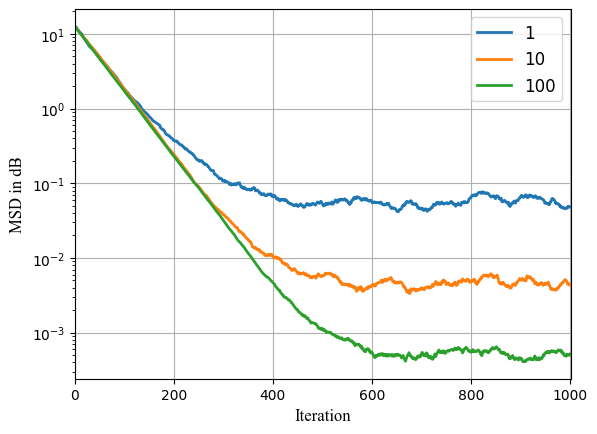

In [8]:
plt.figure()
plt.semilogy(range(iterations+1), np.mean(error, axis=2), linewidth=2)
plt.legend(nr_agents, fontsize=12 )
plt.xlabel('Iteration',fontsize=12,fontname='times new roman' )
plt.ylabel('MSD in dB',fontsize= 12,fontname='times new roman' )
plt.xlim(0,iterations+1)
plt.grid()
plt.show()